## Setting Up DataFrame for a User Based Recommender System

In [2]:
import pandas as pd
import numpy as np

In [226]:
df = pd.read_csv('loans.csv')

In [8]:
loan_lenders_df = pd.read_csv('loans_lenders.csv')

#### Adding Lender column (User ID) to Loans DF

In [9]:
#creating lenders column , linked on LOAN_ID 
df_main = df.merge(loan_lenders_df, on='LOAN_ID')

In [10]:
#turn lenders column into a list, so we can expand our DF by lender for each loan
df_main['LENDERS'] = df_main['LENDERS'].str.split(', ')

In [11]:
df_main = df_main.explode('LENDERS')

In [12]:
df_main.shape

(40797914, 35)

In [13]:
df_main.columns

Index(['LOAN_ID', 'LOAN_NAME', 'ORIGINAL_LANGUAGE', 'DESCRIPTION',
       'DESCRIPTION_TRANSLATED', 'FUNDED_AMOUNT', 'LOAN_AMOUNT', 'STATUS',
       'IMAGE_ID', 'VIDEO_ID', 'ACTIVITY_NAME', 'SECTOR_NAME', 'LOAN_USE',
       'COUNTRY_CODE', 'COUNTRY_NAME', 'TOWN_NAME', 'CURRENCY_POLICY',
       'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY', 'PARTNER_ID',
       'POSTED_TIME', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME',
       'RAISED_TIME', 'LENDER_TERM', 'NUM_LENDERS_TOTAL',
       'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES', 'TAGS', 'BORROWER_NAMES',
       'BORROWER_GENDERS', 'BORROWER_PICTURED', 'REPAYMENT_INTERVAL',
       'DISTRIBUTION_MODEL', 'LENDERS'],
      dtype='object')

In [14]:
#2,131,663 total unique loans
df_main.LOAN_ID.nunique()

2131663

#### Number of Total Lenders - 1,688,929

In [21]:
#Total number of unique lenders = 1,688,929
df_main['LENDERS'].nunique()

1688929

#### Number of Total Lenders Contributing to Multiple Loans - 1,090,336
#### Number of Total Lenders Contributing to Only One Loan - 598,593

In [10]:
#Create new dataframe with only repeat lenders
#https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python
df_main = df_main[df_main.LENDERS.duplicated(keep=False)]

In [11]:
#Check number of lenders who made more than one loan
df_main['LENDERS'].nunique()

1090336

#### Examining LOAN_PURCHASE_NUM Column

In [ ]:
#Add column of number of loans made by each user by merging with lenders.csv on LENDERS column (PERMANENT_NAME in lenders.csv)
lenders_df = pd.read_csv('./kivasnaps/lenders.csv')

In [ ]:
lenders_df.rename(columns={'PERMANENT_NAME': 'LENDERS'}, inplace=True)
lenders_df.rename(columns={'COUNTRY_CODE': 'LENDER_COUNTRY_CODE'}, inplace=True)
lenders_df = lenders_df[['LENDERS', 'LENDER_COUNTRY_CODE', 'LOAN_PURCHASE_NUM']]

In [ ]:
#different from unique lenders in df_main DF? Could be due to different data used in snapshots provided by Kiva
lenders_df['LENDERS'].nunique()

In [ ]:
df_main = df_main.merge(lenders_df, on='LENDERS')

In [ ]:
df_main.shape

In [ ]:
#LOAN_PURCHASE_NUM data is wrong, because all of the lenders should now have at least 2 loans made
len(df_main[df_main['LOAN_PURCHASE_NUM'] == 1])

#### Create new LOANS_MADE Column showing Total Loans Made for Each User

In [16]:
df_main.isna().sum()

LOAN_ID                                   0
LOAN_NAME                           1070482
ORIGINAL_LANGUAGE                    946851
DESCRIPTION                          956501
DESCRIPTION_TRANSLATED              9302095
FUNDED_AMOUNT                             0
LOAN_AMOUNT                               0
STATUS                                    0
IMAGE_ID                             946851
VIDEO_ID                           40686500
ACTIVITY_NAME                             0
SECTOR_NAME                               0
LOAN_USE                             947148
COUNTRY_CODE                          12004
COUNTRY_NAME                              0
TOWN_NAME                           4705981
CURRENCY_POLICY                           0
CURRENCY_EXCHANGE_COVERAGE_RATE    11778230
CURRENCY                                  0
PARTNER_ID                                0
POSTED_TIME                               0
PLANNED_EXPIRATION_TIME             7659843
DISBURSE_TIME                   

In [17]:
# used this solution from https://stackoverflow.com/questions/17709270/create-column-of-value-counts-in-pandas-dataframe
df_main['LOANS_MADE'] = df_main.groupby(['LENDERS'])['LOAN_ID'].transform('count')

In [19]:
df_main.LENDERS.value_counts()

gooddogg1            308507
themissionbeltco     221059
trolltech4460        211759
nms                  181897
gmct                 128159
                      ...  
sean2136                  1
elizabeth81199189         1
allison4569               1
hannah3749                1
rebecca75642721           1
Name: LENDERS, Length: 1688929, dtype: int64

In [20]:
# Checking that new LOANS_MADE column is accurately mapping total count seen in LENDERS.value_counts()
df_main['LOANS_MADE'].max()

308507

#### Reduce Size by Dropping Uncessary Columns for Analysis

In [22]:
user_df = df_main.drop(columns = (['LOAN_NAME', 'FUNDED_AMOUNT', 'STATUS',
       'IMAGE_ID', 'VIDEO_ID', 'TOWN_NAME', 'CURRENCY_POLICY',
       'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY', 'PARTNER_ID',
       'PLANNED_EXPIRATION_TIME', 'LENDER_TERM', 'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES',
       'BORROWER_NAMES', 'BORROWER_PICTURED', 'REPAYMENT_INTERVAL']), axis=1)

In [ ]:
user_df.to_csv('user_df.csv')

#### Create DataFrame With Country Code, Number of Loans Made, and Loan IDs per User

In [33]:
user_eda = user_df.groupby(['LENDERS'])['LOANS_MADE'].mean().reset_index()

In [90]:
lenders_df = pd.read_csv('lenders.csv')

lenders_df.rename(columns={'PERMANENT_NAME': 'LENDERS'}, inplace=True)
lenders_df.rename(columns={'COUNTRY_CODE': 'LENDER_COUNTRY_CODE'}, inplace=True)
lenders_df = lenders_df[['LENDERS', 'LENDER_COUNTRY_CODE']]

user_eda = user_eda.merge(lenders_df, on='LENDERS')                       

In [93]:
user_eda.head()

,Unnamed: 0,LENDERS,LOANS_MADE,LENDER_COUNTRY_CODE
0,0,00000,39.0,DE
1,1,0002,70.0,US
2,2,00mike00,1.0,NaN
3,3,0101craign0101,71.0,US
4,4,013023,1.0,NaN


In [104]:
#https://www.geeksforgeeks.org/how-to-list-values-for-each-pandas-group/
loan_list = df_main.groupby('LENDERS')['LOAN_ID'].apply(list)

df_loan_list = loan_list.reset_index(name = 'LOAN_ID')

In [105]:
df_loan_list.head()

,LENDERS,LOAN_ID
0,00000,"[197839, 164672, 163179, 195614, 161671, 186831, 186026, 163925, 158238, 162968, 152732, 158749, 157653, 163534, 161416, 163724, 161077, 162762, 163713, 163579, 195013, 158076, 166748, 163530, 195067, 170826, 189240, 155775, 163169, 165254, 158377, 163566, 162262, 162813, 163200, 157424, 159976, 163646, 162855]"
1,0002,"[137698, 711591, 272120, 293916, 248805, 76650, 76650, 349696, 293876, 169464, 489656, 152862, 561404, 170354, 268050, 393505, 208527, 182390, 293935, 703777, 705025, 314614, 217471, 361807, 314408, 677363, 185230, 578733, 190776, 235655, 402856, 170036, 151450, 269020, 151534, 76794, 76794, 76835, 293855, 436978, 217481, 314613, 711683, 315981, 489654, 95798, 833838, 314612, 21116, 558202, 671323, 20980, 109071, 167528, 110259, 95909, 76253, 168801, 675234, 20257, 556790, 301102, 473766, 362542, 110015, 137670, 832597, 708297, 143228, 268267]"
2,00mike00,[502260]
3,0101craign0101,"[22041, 167368, 366808, 400096, 133690, 431402, 419314, 12318, 472988, 206465, 167693, 158380, 84062, 256059, 398609, 260897, 8903, 300627, 452568, 277719, 13283, 347327, 89116, 404762, 322498, 58183, 357481, 29624, 312681, 129539, 13062, 72307, 495616, 472622, 372153, 430771, 54354, 64417, 56458, 79428, 349925, 8906, 361938, 101779, 226831, 180529, 30596, 91947, 116365, 83825, 7198, 293450, 142839, 373353, 242722, 62775, 495777, 62592, 474862, 199877, 136208, 383846, 12243, 456304, 62906, 329128, 114118, 215383, 7450, 1114578, 507812]"
4,013023,[1730367]


In [108]:
user_eda = user_eda.merge(df_loan_list, on='LENDERS')    

In [109]:
user_eda.head()

,Unnamed: 0,LENDERS,LOANS_MADE,LENDER_COUNTRY_CODE,LOAN_ID
0,0,00000,39.0,DE,"[197839, 164672, 163179, 195614, 161671, 186831, 186026, 163925, 158238, 162968, 152732, 158749, 157653, 163534, 161416, 163724, 161077, 162762, 163713, 163579, 195013, 158076, 166748, 163530, 195067, 170826, 189240, 155775, 163169, 165254, 158377, 163566, 162262, 162813, 163200, 157424, 159976, 163646, 162855]"
1,1,0002,70.0,US,"[137698, 711591, 272120, 293916, 248805, 76650, 76650, 349696, 293876, 169464, 489656, 152862, 561404, 170354, 268050, 393505, 208527, 182390, 293935, 703777, 705025, 314614, 217471, 361807, 314408, 677363, 185230, 578733, 190776, 235655, 402856, 170036, 151450, 269020, 151534, 76794, 76794, 76835, 293855, 436978, 217481, 314613, 711683, 315981, 489654, 95798, 833838, 314612, 21116, 558202, 671323, 20980, 109071, 167528, 110259, 95909, 76253, 168801, 675234, 20257, 556790, 301102, 473766, 362542, 110015, 137670, 832597, 708297, 143228, 268267]"
2,2,00mike00,1.0,NaN,[502260]
3,3,0101craign0101,71.0,US,"[22041, 167368, 366808, 400096, 133690, 431402, 419314, 12318, 472988, 206465, 167693, 158380, 84062, 256059, 398609, 260897, 8903, 300627, 452568, 277719, 13283, 347327, 89116, 404762, 322498, 58183, 357481, 29624, 312681, 129539, 13062, 72307, 495616, 472622, 372153, 430771, 54354, 64417, 56458, 79428, 349925, 8906, 361938, 101779, 226831, 180529, 30596, 91947, 116365, 83825, 7198, 293450, 142839, 373353, 242722, 62775, 495777, 62592, 474862, 199877, 136208, 383846, 12243, 456304, 62906, 329128, 114118, 215383, 7450, 1114578, 507812]"
4,4,013023,1.0,NaN,[1730367]


##### Remove '[]' from the LOAN_ID column

In [317]:
user_eda['LOAN_ID'] = user_eda['LOAN_ID'].str.strip("[]")

##### Save user_eda to CSV

In [276]:
user_eda.to_csv('user_eda.csv')

#### Creating reduced dataframe filtered on loans made between 10 & 100

##### 40.5 million total loans made

In [17]:
user_eda.LOANS_MADE.sum()

40500157.0

In [18]:
user_eda.query("(LOANS_MADE > 10) & (LOANS_MADE < 100)")['LOANS_MADE'].sum()

11235930.0

In [319]:
users_10_100 = user_eda.query("(LOANS_MADE > 10) & (LOANS_MADE < 100)")[['LENDERS', 'LOAN_ID']]

In [321]:
users_10_100.to_csv('users10_100.csv')

In [320]:
users_10_100.head()

,LENDERS,LOAN_ID
0,00000,"197839, 164672, 163179, 195614, 161671, 186831, 186026, 163925, 158238, 162968, 152732, 158749, 157653, 163534, 161416, 163724, 161077, 162762, 163713, 163579, 195013, 158076, 166748, 163530, 195067, 170826, 189240, 155775, 163169, 165254, 158377, 163566, 162262, 162813, 163200, 157424, 159976, 163646, 162855"
1,0002,"137698, 711591, 272120, 293916, 248805, 76650, 76650, 349696, 293876, 169464, 489656, 152862, 561404, 170354, 268050, 393505, 208527, 182390, 293935, 703777, 705025, 314614, 217471, 361807, 314408, 677363, 185230, 578733, 190776, 235655, 402856, 170036, 151450, 269020, 151534, 76794, 76794, 76835, 293855, 436978, 217481, 314613, 711683, 315981, 489654, 95798, 833838, 314612, 21116, 558202, 671323, 20980, 109071, 167528, 110259, 95909, 76253, 168801, 675234, 20257, 556790, 301102, 473766, 362542, 110015, 137670, 832597, 708297, 143228, 268267"
3,0101craign0101,"22041, 167368, 366808, 400096, 133690, 431402, 419314, 12318, 472988, 206465, 167693, 158380, 84062, 256059, 398609, 260897, 8903, 300627, 452568, 277719, 13283, 347327, 89116, 404762, 322498, 58183, 357481, 29624, 312681, 129539, 13062, 72307, 495616, 472622, 372153, 430771, 54354, 64417, 56458, 79428, 349925, 8906, 361938, 101779, 226831, 180529, 30596, 91947, 116365, 83825, 7198, 293450, 142839, 373353, 242722, 62775, 495777, 62592, 474862, 199877, 136208, 383846, 12243, 456304, 62906, 329128, 114118, 215383, 7450, 1114578, 507812"
45,05092021,"2166723, 2176851, 2167054, 2139570, 2176907, 2152095, 2164558, 2170473, 2196406, 2196406, 2176796, 2149702, 2169832, 2215354, 2154002, 2178113, 2153628, 2135219, 2150658, 2155583, 2151932, 2152642, 2172351, 2195857, 2195857, 2157648, 2146388, 2148916, 2159529, 2165156, 2156025, 2203582, 2187402, 2163235, 2159595, 2154841, 2163725, 2181840, 2172641, 2171359, 2155491, 2166905, 2148830, 2164217, 2153837, 2149795, 2146739, 2161607, 2169410, 2150004, 2177847, 2136018, 2163568, 2169315, 2189039, 2182257, 2167500, 2166415, 2169471, 2162443, 2171212, 2174563, 2140971, 2140971, 2167902, 2233633, 2175766, 2168840, 2141786, 2162966, 2150550, 2161787, 2191803, 2167696, 2150841, 2168212, 2141535, 2161873, 2169839, 2159825"
65,070707Weddingtablegifts,"290446, 448003, 447505, 170303, 78210, 13513, 678603, 533608, 967648, 536341, 291479, 964358, 123240, 123240, 291965, 364420, 439676, 122873, 13385, 170170, 291473, 536411, 122580, 122580, 288684, 447864, 964447, 123593, 225180, 225180, 123592, 291846, 964452, 372130, 590674, 123613, 13659, 372694, 535171, 123570, 13368, 447125, 593716, 122879, 122879, 77921, 291961, 447580, 447580, 291765, 372651, 170346, 593677, 289474, 372613, 366944, 72058, 372775, 77647, 78218, 13433, 536362"


In [322]:
users_10_100['LOAN_ID'] = users_10_100['LOAN_ID'].str.split(', ')

In [323]:
users_10_100.shape

(361895, 2)

In [328]:
test10 = users_10_100.explode('LOAN_ID')

In [329]:
test10.shape

(11235930, 2)

In [18]:
user_eda = pd.read_csv('user_eda.csv')

In [19]:
users_25_50 = user_eda.query("(LOANS_MADE > 25) & (LOANS_MADE < 30)")[['LENDERS', 'LOAN_ID']]

In [20]:
users_25_50['LOAN_ID'] = users_25_50['LOAN_ID'].str.split(', ')

In [339]:
users_25_50.to_csv('users25_50.csv')

In [21]:
test25 = users_25_50.explode('LOAN_ID')

In [22]:
test25.shape

(696276, 2)

In [23]:
test25['COUNT'] = 1

In [24]:
test25.to_csv('test25.csv')

### Creating a Kiva Team Recommender Based on Users

In [14]:
table = pd.pivot_table(test25.head(200000), values='COUNT', index=['LENDERS'],
                       columns=['LOAN_ID'], aggfunc=np.sum, fill_value=0)

table.head()
table.to_csv('users_pivot_table.csv')

LOAN_ID,1000006,1000016,1000029,1000042,1000047,1000048,1000066,1000079,1000082,1000086,...,999870,999890,999894,999907,999925,999927,999933,999966,999980,999983
LENDERS,,,,,,,,,,,,,,,,,,,,,
11220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1904justin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2viljoens,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31415926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
table.shape

(7293, 170814)

In [25]:
from scipy import sparse
data_sparse = sparse.csr_matrix(table)

In [32]:
print(data_sparse)

  (0, 5286)	1
  (0, 5782)	1
  (0, 5876)	1
  (0, 6384)	1
  (0, 6549)	1
  (0, 6672)	1
  (0, 92210)	1
  (0, 92554)	1
  (0, 93235)	1
  (0, 94657)	1
  (0, 94690)	1
  (0, 94694)	1
  (0, 94741)	1
  (0, 94759)	1
  (0, 100050)	1
  (0, 100085)	1
  (0, 100170)	1
  (0, 102264)	1
  (0, 103697)	1
  (0, 106190)	1
  (0, 109245)	1
  (0, 110632)	1
  (0, 113024)	1
  (0, 115023)	1
  (0, 118432)	1
  :	:
  (7291, 7502)	1
  (7291, 7600)	1
  (7291, 7818)	1
  (7291, 8305)	1
  (7291, 8397)	1
  (7291, 14818)	1
  (7291, 14853)	1
  (7291, 16148)	1
  (7291, 24893)	1
  (7291, 24900)	1
  (7291, 38040)	1
  (7291, 38133)	1
  (7291, 38379)	1
  (7291, 40611)	1
  (7291, 44852)	1
  (7291, 93354)	1
  (7291, 137092)	1
  (7291, 165621)	1
  (7291, 165718)	1
  (7291, 165722)	1
  (7291, 165782)	1
  (7291, 165801)	1
  (7291, 166495)	1
  (7291, 169495)	1
  (7292, 94574)	1


In [35]:
from sklearn.metrics.pairwise import pairwise_distances, cosine_distances, cosine_similarity
dists = pairwise_distances(data_sparse, metric = 'cosine')
dists

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

# calculate similarity between each row (user x loans)
similarities_sparse = cosine_similarity(data_sparse, dense_output=False)

In [173]:
team_recommender = pd.DataFrame(dists,
                          columns = table.index,
                          index = table.index)

team_recommender.head()

LENDERS,11220,1904justin,222,2viljoens,31415926,3todd,441nw8926,7m7558,7snqc6612,9858,...,emily9111,emily91743266,emily91811826,emily9210,emily9219,emily9341,emily94404803,emily9499,emily9627,emily98907142
LENDERS,,,,,,,,,,,,,,,,,,,,,
11220,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1904justin,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
222,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2viljoens,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
31415926,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [175]:
team_recommender.to_csv('team_recommender.csv')

In [161]:
search = '11220'

#loans = table[table.index.str.contains(search)].index
output = team_recommender[search].sort_values()[1:25]
#for loan in loans :
#    print (recommender[loan].sort_values()[1:11])
output

LENDERS
don1153                0.963582
caluk                  0.963582
alison007              0.964263
bert8357               0.964263
celeste                0.964263
catherine1264          0.964263
corinna8028            0.964907
aurelie9561            0.964907
daniel8353             0.965517
edna9161               0.966097
dawnandalastair1538    0.966648
colleen1327            1.000000
colleen7281            1.000000
colleen6212            1.000000
colleen5907            1.000000
colleen58521098        1.000000
colleen5225            1.000000
colleen4773            1.000000
colleen4677            1.000000
colleen4614            1.000000
colleen3506            1.000000
colleen1312            1.000000
colleen3231            1.000000
colleen7424            1.000000
Name: 11220, dtype: float64

In [162]:
output.index

Index(['don1153', 'caluk', 'alison007', 'bert8357', 'celeste', 'catherine1264',
       'corinna8028', 'aurelie9561', 'daniel8353', 'edna9161',
       'dawnandalastair1538', 'colleen1327', 'colleen7281', 'colleen6212',
       'colleen5907', 'colleen58521098', 'colleen5225', 'colleen4773',
       'colleen4677', 'colleen4614', 'colleen3506', 'colleen1312',
       'colleen3231', 'colleen7424'],
      dtype='object', name='LENDERS')

In [163]:
top_users = []
for user in output.index:
    top_users.append(user)
    
top_users

['don1153',
 'caluk',
 'alison007',
 'bert8357',
 'celeste',
 'catherine1264',
 'corinna8028',
 'aurelie9561',
 'daniel8353',
 'edna9161',
 'dawnandalastair1538',
 'colleen1327',
 'colleen7281',
 'colleen6212',
 'colleen5907',
 'colleen58521098',
 'colleen5225',
 'colleen4773',
 'colleen4677',
 'colleen4614',
 'colleen3506',
 'colleen1312',
 'colleen3231',
 'colleen7424']

In [171]:
import requests
count = 0
print("Kiva Teams we think you might you like:")
for user in top_users:
    base_url = f'https://api.kivaws.org/v1/lenders/{user}/teams.json'

#graphql_query = "{lend {loan (id: 1568001){id name}}}"

   
    try:
        r = requests.get(base_url)
        r = r.json()
        r['teams'][0]['name']
        count += 1
        print(r['teams'][0]['name'])
        if count == 5:
            break
    except Exception:
        pass

    

Kiva Teams we think you might you like:
Bosnia
G | Gärtner, Gardeners
Team Verdacom
Coll's Plants
Dave Bickel Memorial


### Using Kiva's API to Get Borrower Profile Picture

In [228]:
base_url = 'https://api.kivaws.org/graphql?query='
loan_id = 691404
#couldn't use f' because of other brackets present, looked up another way : https://realpython.com/python-f-strings/
#graphql example query on Kiva's website : https://www.kiva.org/build/docs
graphql_query = '{lend {loan (id: %s){id name gender image {id url}  }}}'   %loan_id

r = requests.post(base_url+ graphql_query)
r = r.json()
url = r['data']['lend']['loan']['image']['url']

In [229]:
r['data']['lend']['loan']['image']['url']

'https://www-kiva-org-0.freetls.fastly.net/img/s100/5d659734f0880d5c53f2f5887dd9c55c.jpg'

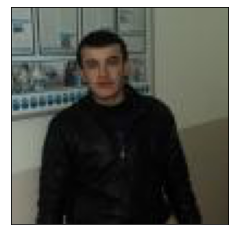

In [256]:
#https://stackoverflow.com/questions/49092390/displaying-getting-images-from-an-url-in-python
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

response = requests.get(url)
img = Image.open(BytesIO(response.content))
#removing ticks from x/y axis : https://www.delftstack.com/howto/matplotlib/how-to-hide-axis-text-ticks-and-or-tick-labels-in-matplotlib/
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.imshow(img)
plt.show();

### Content Recommender System - Function Displaying Recommended Loans

In [228]:
df.query("LOAN_ID == 158380")['LOAN_NAME']

384482    Nuevo Esfuerzo Group
Name: LOAN_NAME, dtype: object

In [264]:
# function that takes in rec sys output loan ID and spits out LOAN DETAILS
def kiva_output(loan_1, loan_2, loan_3):
    #return details from loans_df on each loan : Name, Gender, Loan Amount, Activity/Sector Name, Description, Country
    x = df.query(f"LOAN_ID == {loan_1}")[['LOAN_NAME', 'BORROWER_GENDERS', 'LOAN_AMOUNT', 'ACTIVITY_NAME', 'SECTOR_NAME', 'DESCRIPTION', 'COUNTRY_NAME']]
    y = df.query(f"LOAN_ID == {loan_2}")[['LOAN_NAME', 'BORROWER_GENDERS', 'LOAN_AMOUNT', 'ACTIVITY_NAME', 'SECTOR_NAME', 'DESCRIPTION', 'COUNTRY_NAME']]
    z = df.query(f"LOAN_ID == {loan_3}")[['LOAN_NAME', 'BORROWER_GENDERS', 'LOAN_AMOUNT', 'ACTIVITY_NAME', 'SECTOR_NAME', 'DESCRIPTION', 'COUNTRY_NAME']]
    #combine all loan details into one dataframe 
    final = pd.concat([x, y, z])
    return final

In [265]:
kiva_output(158380, 999604, 999042)

,LOAN_NAME,BORROWER_GENDERS,LOAN_AMOUNT,ACTIVITY_NAME,SECTOR_NAME,DESCRIPTION,COUNTRY_NAME
384482,Nuevo Esfuerzo Group,"male, male, male",650.0,Retail,Retail,"el grupo el nuevo Esfuerzo esta integrado por 3 hombres los cuales son muy trabajadores, tienen mucho tiempo de conocerce, a continuacion se detalla las diferentes actividades que ellos realizan para ganarse la vida diariamente:\n\nJUAN ANTONIO C., es el jefe del grupo, tiene 64 años de edad, esta casado y tuvo 3 hijos en su matrimonio, actualmente el cuenta con un molino para moler maiz, este lo tieen ubicado en su casa de habitacion, atiende en horas de la madrugada ya que el tambien se dedica a realizar trabajos de albañileria despues lo queda atendiendo su esposa, ellos son un matrimonio bien establecido y gracias a los ingresos del molino ellos han sacado a adelante a su familia. ahora el esta solicitando el credito para mejorar la caseta en donde esta el molino.\n\n\nELIAS ANTONIO C. es comerciante, cuenta con un molino para moler maiz, su negocio esta ubicado en su casa de habitacion, tiene 8 años de dedicarse a este tipo de actividiad y gracias a estos ingresos el puede cubrir los gastos familiares y otros compromisos, es importante decir que el señor C. sufrio un accidente en una maquina cuando el trabajaba para una fabrica de elaboracion de cajas para empacar Puros, la que le corto cuatro dedos de su mano derecha, fue ahi cuando el sintio la necesidad de buscar otra fuente de ingresos ya que no podia seguir trabajando en dicho lugar y hasta el momento el sostiene a su familia, tiene 4 hijos los que con mucho sacrificio ha logrado graduar y otros estan estudiando, actualmente el necesita comprar unos repuestos para el molino.\n\nESTEBAN S. su actividad principal es la venta de helados de diferentes sabores, vende conos en diferentes barrios y colonias de la ciudad de Danli, actividad que realiza de manera ambulante en una bicicleta, tiene varios años de dedicarse a este tipo de actividad que le genera ingresos para cubrir sus compromisos y gastos familiares, tiene 5 hijos que ya estan casados.\nEl junto con su esposa siempre siguen luchando por salir adelante, actualmente el solicita un credito para surtir un poco mas su negocio.\n\ntodos ellos necesitan el credito para poder salir adelante con sus negocios y sus familias.\n",Honduras
10213,Kalpana,female,325.0,Dairy,Agriculture,"Kalpana lives in a small village of Falakata, West Bengal. She is an enterprising lady who is 33 years old. She is married and the mother of two children (one son and one daughter). Her children read in school. Kalpana desires to provide a good education to her children. Thus, she works hard. <br /><br />Her husband is engaged in a fruit business and Kalpana has a small dairy farm where she supplies milk and milk products like ghee to different households in their village every day. She also sells cow dung for additional income, which is widely used as manure in rural areas. She has to work really hard in order to support her family and to bear her children's educational expenses.<br /><br />Therefore, she plans to buy another cow to generate more income. Through this, she will be able to serve more customers, thus increase her sales. Kalpana has applied for a loan from Kiva through BJS to buy a dairy cow and fodder to expand her business.<br /><br />She hopes that this investment will help her to gain additional income to fulfill her dream of giving a higher education to her children.<br /><br />She is thankful to both BJS and Kiva.",India
161211,XIMENA LILIBETH,female,1575.0,Farming,Agriculture,"La señora Ximena una mujer luchadora, es madre soltera su hijita tiene 5 años, la señora Ximena se dedica a la producción de cacao en la finca de sus Padres y también se dedica a la venta de ropa tiene varios años de experiencia en estos negocios las aprendió por iniciativa propia y con la ayuda de sus Padres, a esta actividad le dedica varias horas al día ya que debe distribuir su tiempo en e